# KD correlation vs downregulation
___

## 1. Determine which genes to use for analysis

We need to examine genes that have both been knocked down and that are landmark expression readout genes

In [327]:
import pandas as pd
from support_functions import log_progress
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels   # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels

In [32]:
# extract consenus KD expression signatures
consensi_kd_df = pd.DataFrame.from_csv('KD_consensus_sigs.csv').T # 978 x 4363
kd_genes = consensi_kd_df.columns.values.astype(str)

In [37]:
# determine which genes/IDs are landmark genes
gene_info_df = pd.read_csv('../LINCS_target_prediction/data/GSE92742_Broad_LINCS_gene_info.txt', sep='\t', header=0)
lm_genes_df = gene_info_df[gene_info_df['pr_is_lm'].astype(bool)]
lm_genes = lm_genes_df.pr_gene_symbol.values.astype(str) # n = 978

In [104]:
# find the union of kd and lm genes
union_genes = list( set(kd_genes) & set(lm_genes) ) # n = 946 

In [246]:
lm_genes_df[lm_genes_df.pr_gene_symbol == 'DDR1'].pr_gene_id.values[0]

780

## 2. Compute cpd-kd correlations

In [263]:
# load drugbank cpd data
consensi_cpd_df = pd.DataFrame.from_csv('DB_consensus_sigs.csv').T # 978 x 1170
db_cpds = consensi_cpd_df.columns.values.astype(str)

In [109]:
corr_df = pd.DataFrame(columns=db_cpds)

In [115]:
for gene in log_progress(union_genes):
    gene_profile = consensi_kd_df[gene]
    cpd_corrs = pd.Series(consensi_cpd_df.corrwith(gene_profile), name=gene)
    corr_df = corr_df.append(cpd_corrs)

## 3. Plot Z-score as a function of correlation

In [286]:
# create bins for the different correlation levels
bins = [-1.0, -0.9, -0.8, -0.7, -.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0,
        0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,]

In [290]:
# store the Z-score distributions at each correlation level
Z_dict = { b:[] for b in bins }

for cpd in log_progress(corr_df.columns):
    cpd_profile = consensi_cpd_df[cpd]

    for gene in corr_df.index:
        
        # extract the Z-score for this gene after cpd treatment
        gene_id = lm_genes_df.query('pr_gene_symbol == "{}"'.format(gene)).pr_gene_id.values[0]
        Z_score = cpd_profile[str(gene_id)]
        
        # extract the cpd-kd correlation to determine which bin to store the Z-score
        corr = corr_df.at[gene,cpd]
        Z_dict_key = bins[np.digitize(corr, bins, right=True)]
        
        # store the Z-score in the dictionary
        Z_dict[Z_dict_key] += [Z_score]

In [309]:
Z_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in Z_dict.items() ]))

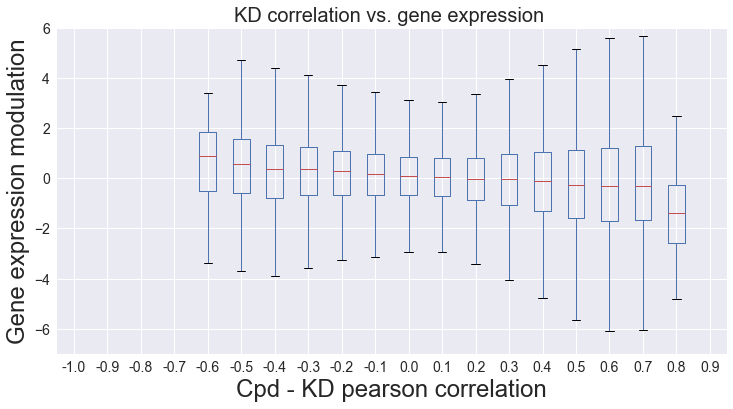

In [330]:

plt.figure(figsize=(12,6))
Z_df.boxplot()
plt.title("KD correlation vs. gene expression ")
plt.xlabel("Cpd - KD pearson correlation")
plt.ylabel("Gene expression modulation")
plt.ylim(-7,6)
plt.show()

In [314]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
